## Atividade 4

## Classificador de imagens de dia e noite


Utilizando o conjunto de imagens do dataset do projeto [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), construir um classificador de imagens que dado uma determinada imagem deverá ser capaz em classificar em _dia_ ou _noite_.

Para este modelo, será levado em consideração como principal característica seu respectivo valor de brilho.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

## 2. Principais atividades do _pipeline_

1. Normalizar
2. Extrair características
3. Construir classificador
4. Testar o modelo

*Adaptado deste [repositório](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) de Visão Computacional da Udacity, de Cezanne Camacho.*

In [78]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def carregar_arquivos(image_dir):
    
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            im = cv2.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [79]:
lista_imagens_teste = carregar_arquivos("imagens/test")
lista_imagens_treinamento = carregar_arquivos("imagens/training")

## 3. Normalização

Constuir uma função que receberá uma imagem e redimensionará para o tamanho 1000 x 600.
Vamos inspecionar algumas imagens.

Esta a seguir possui 700 de altura 1300 de comprimento.

Text(0.5, 1.0, 'night')

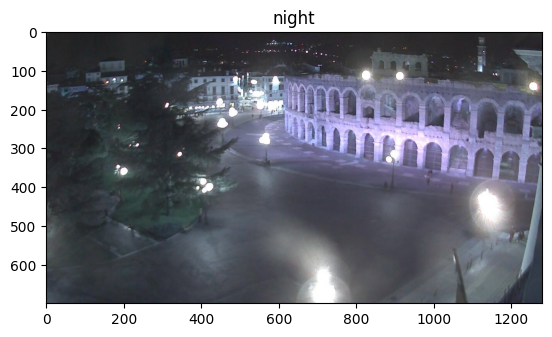

In [80]:
plt.imshow(lista_imagens_treinamento[200][0])
plt.title(lista_imagens_treinamento[200][1])

Já esta nova imagem é menor, possuindo 350 x 650 pixels.

Text(0.5, 1.0, 'day')

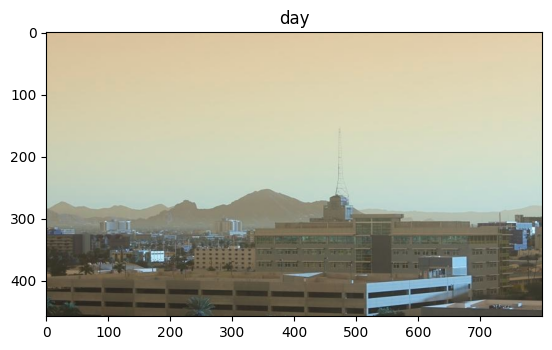

In [81]:
plt.imshow(lista_imagens_treinamento[0][0])
plt.title(lista_imagens_treinamento[0][1])

In [82]:
from PIL import Image

def padronizar_imagem(imagem):
    # Abrir a imagem usando o PIL
    img = Image.open(imagem).convert("L")
    
    # Redimensionar a imagem para 1000 x 600
    img = img.resize((1000, 600))
    
    # Retornar a imagem redimensionada
    return img

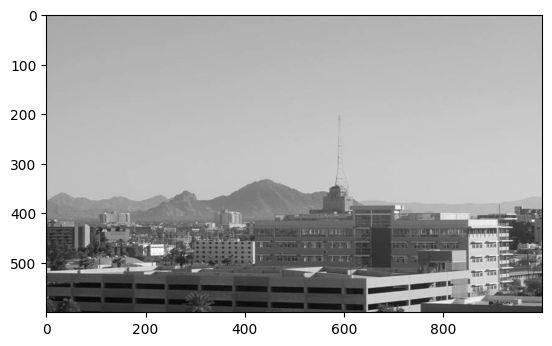

In [83]:
imagem_original = "imagens/test/day/20151101_152050.jpg"
imagem_redimensionada = padronizar_imagem(imagem_original)
plt.imshow(imagem_redimensionada, cmap = "gray")

## 4. Extração de características

Para cada imagem analisada, extrair o componente de brilho médio associado.

In [84]:
import os

def extrair_brilho(caminho_base):
  
  path_base = caminho_base
  dicionarioTreino = {
      "caminhoDay": [],
      "imagemDay": [],
      "mediaDay": [],
      "yDay": [],
      "caminhoNight" : [],
      "imagemNight": [],
      "mediaNight": [],
      "yNight": [],
  }
  dicionarioTeste = {
      "caminhoDay": [],
      "imagemDay": [],
      "mediaDay": [],
      "yDay": [],
      "caminhoNight" : [],
      "imagemNight": [],
      "mediaNight": [],
      "yNight": [],
  }

  for caminho,subcaminho,arquivos in os.walk(path_base):

    for imagem in arquivos:
      caminhocompleto = os.path.join(caminho,imagem)
      img = padronizar_imagem(caminhocompleto)

      if "day" in caminhocompleto and "training" in caminhocompleto:
        brilho_medio = np.mean(img)
        dicionarioTreino["caminhoDay"].append(caminhocompleto)
        dicionarioTreino["imagemDay"].append(np.array(img))
        dicionarioTreino["mediaDay"].append(brilho_medio)
        dicionarioTreino["yDay"].append(0)
      elif "night" in caminhocompleto and "training" in caminhocompleto:
        brilho_medio = np.mean(img)
        dicionarioTreino["caminhoNight"].append(caminhocompleto)
        dicionarioTreino["imagemNight"].append(np.array(img))
        dicionarioTreino["mediaNight"].append(brilho_medio)
        dicionarioTreino["yNight"].append(1)

      elif "day" in caminhocompleto and "test" in caminhocompleto:
        brilho_medio = np.mean(img)
        dicionarioTeste["caminhoDay"].append(caminhocompleto)
        dicionarioTeste["imagemDay"].append(np.array(img))
        dicionarioTeste["mediaDay"].append(brilho_medio)
        dicionarioTeste["yDay"].append(0)
      elif "night" in caminhocompleto and "test" in caminhocompleto:
        brilho_medio = np.mean(img)
        dicionarioTeste["caminhoNight"].append(caminhocompleto)
        dicionarioTeste["imagemNight"].append(np.array(img))
        dicionarioTeste["mediaNight"].append(brilho_medio)
        dicionarioTeste["yNight"].append(1)

  return dicionarioTreino, dicionarioTeste
      

In [85]:
data1,data2 = extrair_brilho("imagens")

Agora vamos construir uma lista com todas as imagens e seus brilhos médios extraídos. Vamos também rotular as imagens utilizando hot-enconding, sendo 1 para dia e 0 para noite.

In [86]:
import pandas as pd

dfTreino = pd.DataFrame(data1)
dfTeste = pd.DataFrame(data2)

In [87]:
dfTreino

,caminhoDay,imagemDay,mediaDay,yDay,caminhoNight,imagemNight,mediaNight,yNight
0,imagens\training\day\20151101_142050.jpg,"[[186, 186, 186, 186, 185, 185, 184, 184, 184,...",162.469590,0,imagens\training\night\20151101_082503.jpg,"[[22, 16, 25, 11, 19, 38, 24, 23, 19, 18, 22, ...",21.116640,1
1,imagens\training\day\20151101_145049.jpg,"[[185, 187, 188, 186, 184, 184, 186, 188, 187,...",171.348298,0,imagens\training\night\20151101_085511.jpg,"[[28, 17, 24, 11, 13, 25, 15, 23, 22, 29, 25, ...",20.831087,1
2,imagens\training\day\20151101_145511.jpg,"[[174, 173, 171, 170, 170, 171, 173, 174, 172,...",116.977862,0,imagens\training\night\20151101_092511.jpg,"[[13, 20, 21, 15, 12, 19, 23, 22, 12, 15, 9, 1...",19.472562,1
3,imagens\training\day\20151101_155059.jpg,"[[183, 183, 183, 183, 182, 182, 181, 181, 181,...",171.470837,0,imagens\training\night\20151101_095505.jpg,"[[13, 18, 18, 12, 11, 17, 19, 16, 7, 15, 19, 1...",18.916677,1
4,imagens\training\day\20151101_155521.jpg,"[[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, ...",94.539108,0,imagens\training\night\20151101_105513.jpg,"[[8, 11, 8, 5, 7, 13, 13, 8, 7, 9, 6, 16, 12, ...",17.291398,1
...,...,...,...,...,...,...,...,...
115,imagens\training\day\20151119_081621.jpg,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",149.833835,0,imagens\training\night\20151115_232259.jpg,"[[64, 59, 45, 9, 24, 65, 58, 56, 66, 34, 20, 5...",64.378895,1
116,imagens\training\day\20151119_084642.jpg,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...",159.452148,0,imagens\training\night\20151116_012254.jpg,"[[1, 11, 18, 4, 13, 34, 14, 3, 9, 4, 3, 9, 11,...",65.245562,1
117,imagens\training\day\20151119_101603.jpg,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...",145.664327,0,imagens\training\night\20151116_022257.jpg,"[[9, 20, 31, 23, 17, 14, 13, 31, 61, 27, 5, 25...",63.825095,1
118,imagens\training\day\20151119_104608.jpg,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...",162.101500,0,imagens\training\night\20151116_032330.jpg,"[[63, 54, 38, 24, 12, 11, 52, 66, 45, 17, 6, 2...",65.047052,1


In [88]:
dfTeste

,caminhoDay,imagemDay,mediaDay,yDay,caminhoNight,imagemNight,mediaNight,yNight
0,imagens\test\day\20151101_152050.jpg,"[[176, 178, 179, 178, 175, 175, 177, 178, 176,...",167.464087,0,imagens\test\night\20151101_072507.jpg,"[[26, 15, 27, 18, 17, 21, 10, 22, 18, 18, 20, ...",20.525352,1
1,imagens\test\day\20151101_152512.jpg,"[[161, 160, 158, 157, 157, 158, 160, 161, 160,...",139.417457,0,imagens\test\night\20151101_230938.jpg,"[[68, 65, 62, 59, 55, 50, 45, 41, 37, 35, 34, ...",89.728095,1
2,imagens\test\day\20151101_165048.jpg,"[[181, 180, 180, 179, 178, 178, 178, 178, 178,...",171.569605,0,imagens\test\night\20151101_231132.jpg,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",12.933767,1
3,imagens\test\day\20151101_222053.jpg,"[[162, 162, 162, 162, 161, 161, 160, 160, 160,...",168.300803,0,imagens\test\night\20151101_231455.jpg,"[[66, 63, 61, 59, 56, 51, 45, 41, 37, 35, 35, ...",89.803277,1
4,imagens\test\day\20151101_225048.jpg,"[[158, 159, 160, 160, 159, 157, 156, 156, 157,...",166.293988,0,imagens\test\night\20151101_232014.jpg,"[[65, 62, 60, 58, 55, 50, 46, 41, 36, 33, 34, ...",89.323020,1
...,...,...,...,...,...,...,...,...
75,imagens\test\day\20151105_141042.jpg,"[[131, 134, 130, 131, 138, 138, 135, 137, 137,...",120.076075,0,imagens\test\night\20151116_192315.jpg,"[[39, 23, 6, 15, 15, 8, 10, 12, 13, 7, 4, 11, ...",60.658072,1
76,imagens\test\day\20151107_141442.jpg,"[[105, 105, 106, 106, 106, 107, 108, 109, 109,...",119.575113,0,imagens\test\night\20151116_212312.jpg,"[[57, 35, 5, 3, 13, 26, 14, 13, 28, 22, 15, 19...",63.504572,1
77,imagens\test\day\20151107_144446.jpg,"[[153, 153, 154, 154, 154, 155, 156, 157, 157,...",143.213728,0,imagens\test\night\20151119_004611.jpg,"[[104, 94, 84, 95, 79, 56, 100, 106, 64, 86, 9...",88.382720,1
78,imagens\test\day\20151107_154407.jpg,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",140.068595,0,imagens\test\night\20151119_021550.jpg,"[[92, 77, 60, 68, 75, 82, 98, 103, 95, 88, 70,...",81.612343,1


Testando a rotulação de imagem e padronização.

Text(0.5, 1.0, '167.46408666666667')

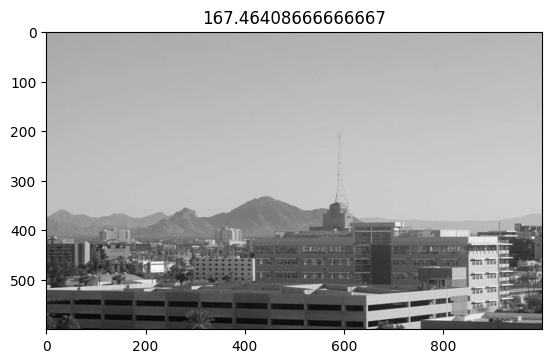

In [89]:
plt.imshow(padronizar_imagem(dfTeste.caminhoDay[0]),cmap = "gray")
plt.title(dfTeste.mediaDay[0])

Text(0.5, 1.0, '171.569605')

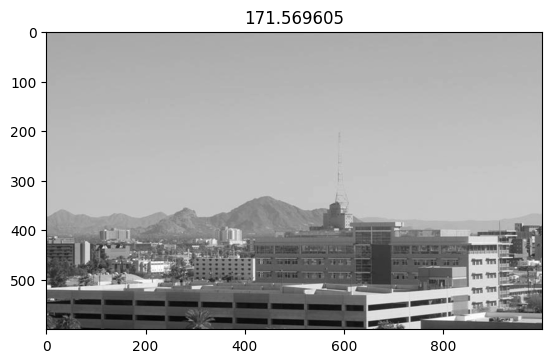

In [90]:
plt.imshow(padronizar_imagem(dfTeste.caminhoDay[2]),cmap = "gray")
plt.title(dfTeste.mediaDay[2])

Obtendo as características de ambos os grupos de imagens, treinamento e testes.

In [91]:
lista_padronizada_treinamento = dfTreino[["mediaDay","mediaNight","yDay","yNight", "imagemDay", "imagemNight"]]
lista_padronizada_teste = dfTeste[["mediaDay","mediaNight","yDay","yNight", "imagemDay", "imagemNight"]]

In [92]:
lista_padronizada_treinamento

,mediaDay,mediaNight,yDay,yNight,imagemDay,imagemNight
0,162.469590,21.116640,0,1,"[[186, 186, 186, 186, 185, 185, 184, 184, 184,...","[[22, 16, 25, 11, 19, 38, 24, 23, 19, 18, 22, ..."
1,171.348298,20.831087,0,1,"[[185, 187, 188, 186, 184, 184, 186, 188, 187,...","[[28, 17, 24, 11, 13, 25, 15, 23, 22, 29, 25, ..."
2,116.977862,19.472562,0,1,"[[174, 173, 171, 170, 170, 171, 173, 174, 172,...","[[13, 20, 21, 15, 12, 19, 23, 22, 12, 15, 9, 1..."
3,171.470837,18.916677,0,1,"[[183, 183, 183, 183, 182, 182, 181, 181, 181,...","[[13, 18, 18, 12, 11, 17, 19, 16, 7, 15, 19, 1..."
4,94.539108,17.291398,0,1,"[[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, ...","[[8, 11, 8, 5, 7, 13, 13, 8, 7, 9, 6, 16, 12, ..."
...,...,...,...,...,...,...
115,149.833835,64.378895,0,1,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...","[[64, 59, 45, 9, 24, 65, 58, 56, 66, 34, 20, 5..."
116,159.452148,65.245562,0,1,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...","[[1, 11, 18, 4, 13, 34, 14, 3, 9, 4, 3, 9, 11,..."
117,145.664327,63.825095,0,1,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...","[[9, 20, 31, 23, 17, 14, 13, 31, 61, 27, 5, 25..."
118,162.101500,65.047052,0,1,"[[253, 253, 253, 254, 254, 254, 254, 254, 254,...","[[63, 54, 38, 24, 12, 11, 52, 66, 45, 17, 6, 2..."


In [93]:
lista_padronizada_treinamento = pd.DataFrame({
    'media': lista_padronizada_treinamento['mediaDay'].tolist() + lista_padronizada_treinamento['mediaNight'].tolist(),
    'y': lista_padronizada_treinamento['yDay'].tolist() + lista_padronizada_treinamento['yNight'].tolist(),
    'imagem': lista_padronizada_treinamento['imagemDay'].tolist() + lista_padronizada_treinamento['imagemNight'].tolist()
})

In [94]:
lista_padronizada_treinamento

,media,y,imagem
0,162.469590,0,"[[186, 186, 186, 186, 185, 185, 184, 184, 184,..."
1,171.348298,0,"[[185, 187, 188, 186, 184, 184, 186, 188, 187,..."
2,116.977862,0,"[[174, 173, 171, 170, 170, 171, 173, 174, 172,..."
3,171.470837,0,"[[183, 183, 183, 183, 182, 182, 181, 181, 181,..."
4,94.539108,0,"[[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, ..."
...,...,...,...
235,64.378895,1,"[[64, 59, 45, 9, 24, 65, 58, 56, 66, 34, 20, 5..."
236,65.245562,1,"[[1, 11, 18, 4, 13, 34, 14, 3, 9, 4, 3, 9, 11,..."
237,63.825095,1,"[[9, 20, 31, 23, 17, 14, 13, 31, 61, 27, 5, 25..."
238,65.047052,1,"[[63, 54, 38, 24, 12, 11, 52, 66, 45, 17, 6, 2..."


In [95]:
lista_padronizada_teste = pd.DataFrame({
    'media': lista_padronizada_teste['mediaDay'].tolist() + lista_padronizada_teste['mediaNight'].tolist(),
    'y': lista_padronizada_teste['yDay'].tolist() + lista_padronizada_teste['yNight'].tolist(),
    'imagem': lista_padronizada_teste['imagemDay'].tolist() + lista_padronizada_teste['imagemNight'].tolist()
})

lista_padronizada_teste

,media,y,imagem
0,167.464087,0,"[[176, 178, 179, 178, 175, 175, 177, 178, 176,..."
1,139.417457,0,"[[161, 160, 158, 157, 157, 158, 160, 161, 160,..."
2,171.569605,0,"[[181, 180, 180, 179, 178, 178, 178, 178, 178,..."
3,168.300803,0,"[[162, 162, 162, 162, 161, 161, 160, 160, 160,..."
4,166.293988,0,"[[158, 159, 160, 160, 159, 157, 156, 156, 157,..."
...,...,...,...
155,60.658072,1,"[[39, 23, 6, 15, 15, 8, 10, 12, 13, 7, 4, 11, ..."
156,63.504572,1,"[[57, 35, 5, 3, 13, 26, 14, 13, 28, 22, 15, 19..."
157,88.382720,1,"[[104, 94, 84, 95, 79, 56, 100, 106, 64, 86, 9..."
158,81.612343,1,"[[92, 77, 60, 68, 75, 82, 98, 103, 95, 88, 70,..."


In [142]:
df = pd.concat([lista_padronizada_treinamento, lista_padronizada_teste])

In [143]:
df

,media,y,imagem
0,162.469590,0,"[[186, 186, 186, 186, 185, 185, 184, 184, 184,..."
1,171.348298,0,"[[185, 187, 188, 186, 184, 184, 186, 188, 187,..."
2,116.977862,0,"[[174, 173, 171, 170, 170, 171, 173, 174, 172,..."
3,171.470837,0,"[[183, 183, 183, 183, 182, 182, 181, 181, 181,..."
4,94.539108,0,"[[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, ..."
...,...,...,...
155,60.658072,1,"[[39, 23, 6, 15, 15, 8, 10, 12, 13, 7, 4, 11, ..."
156,63.504572,1,"[[57, 35, 5, 3, 13, 26, 14, 13, 28, 22, 15, 19..."
157,88.382720,1,"[[104, 94, 84, 95, 79, 56, 100, 106, 64, 86, 9..."
158,81.612343,1,"[[92, 77, 60, 68, 75, 82, 98, 103, 95, 88, 70,..."


## 5. Construção do classificador

Desenvolver um modelo de aprendizado de máquina que seja capaz de classificar adequadamente, com no mínimo 90% de acurácia, as imagens que representam o dia e a noite.

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

classificador_decision_tree = DecisionTreeClassifier(random_state=0)

A função a seguir é para padronizar a forma que o ``ScikitLearn`` obtém os dados, separando o que é classe (Y) do que é feature (X).

In [97]:
def definicao_feature_class(lista_padronizada):
    X = []
    Y = []

    for media in lista_padronizada["media"]:
        X.append(media)
        
    for label in lista_padronizada["y"]:
        Y.append(label)

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [98]:
X, Y = definicao_feature_class(lista_padronizada_treinamento)

In [99]:
X

array([[162.46959   ],
       [171.34829833],
       [116.97786167],
       [171.47083667],
       [ 94.53910833],
       [170.21867   ],
       [ 96.79265667],
       [ 95.51059667],
       [167.494065  ],
       [ 98.85549333],
       [168.15677833],
       [ 97.37680833],
       [165.58374833],
       [ 96.793795  ],
       [166.35587167],
       [ 96.21634   ],
       [168.46015667],
       [163.10253833],
       [ 98.73911167],
       [155.35111333],
       [ 97.68787333],
       [161.75889167],
       [ 96.83487333],
       [162.82679833],
       [ 97.44712333],
       [165.008815  ],
       [ 95.13469833],
       [167.76122833],
       [ 94.20544   ],
       [ 92.841355  ],
       [140.40343833],
       [153.95561667],
       [156.00010167],
       [113.30280333],
       [152.21038167],
       [146.272495  ],
       [144.72869667],
       [ 96.13271833],
       [148.31617333],
       [113.90030833],
       [134.85030833],
       [113.82253   ],
       [139.017565  ],
       [114

In [100]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [144]:
X = df.drop(columns = ["y"])
y = df["y"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 52)


In [146]:
x_train

,media,imagem
45,144.541217,"[[56, 45, 31, 19, 10, 2, 1, 15, 39, 61, 72, 54..."
181,64.845480,"[[62, 40, 12, 11, 10, 12, 40, 50, 34, 18, 10, ..."
23,162.826798,"[[159, 159, 159, 159, 158, 158, 157, 157, 157,..."
123,22.238965,"[[17, 16, 16, 15, 14, 14, 14, 14, 14, 15, 16, ..."
78,127.700005,"[[129, 119, 106, 101, 103, 107, 107, 107, 106,..."
...,...,...
86,123.945800,"[[117, 117, 117, 118, 119, 120, 113, 118, 121,..."
151,14.045247,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1,..."
13,96.793795,"[[89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, ..."
27,92.397470,"[[97, 97, 97, 97, 98, 98, 99, 99, 99, 99, 98, ..."


In [101]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

Testando algumas classificações.

Text(0.5, 1.0, 'imagens\\test\\day\\20151101_152050.jpg')

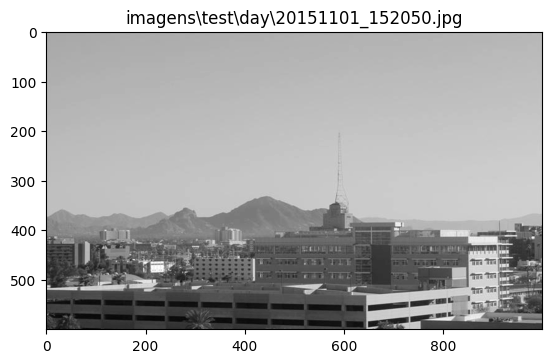

In [102]:
plt.imshow(padronizar_imagem(dfTeste["caminhoDay"][0]), cmap="gray")
plt.title(dfTeste["caminhoDay"][0])

In [103]:
lista_padronizada_teste

,media,y,imagem
0,167.464087,0,"[[176, 178, 179, 178, 175, 175, 177, 178, 176,..."
1,139.417457,0,"[[161, 160, 158, 157, 157, 158, 160, 161, 160,..."
2,171.569605,0,"[[181, 180, 180, 179, 178, 178, 178, 178, 178,..."
3,168.300803,0,"[[162, 162, 162, 162, 161, 161, 160, 160, 160,..."
4,166.293988,0,"[[158, 159, 160, 160, 159, 157, 156, 156, 157,..."
...,...,...,...
155,60.658072,1,"[[39, 23, 6, 15, 15, 8, 10, 12, 13, 7, 4, 11, ..."
156,63.504572,1,"[[57, 35, 5, 3, 13, 26, 14, 13, 28, 22, 15, 19..."
157,88.382720,1,"[[104, 94, 84, 95, 79, 56, 100, 106, 64, 86, 9..."
158,81.612343,1,"[[92, 77, 60, 68, 75, 82, 98, 103, 95, 88, 70,..."


In [104]:
lista_padronizada_teste["media"]

0      167.464087
1      139.417457
2      171.569605
3      168.300803
4      166.293988
          ...    
155     60.658072
156     63.504572
157     88.382720
158     81.612343
159     98.844718
Name: media, Length: 160, dtype: float64

In [105]:
y_pred = classificador_decision_tree.predict(np.array(lista_padronizada_teste["media"]).reshape(-1, 1))

In [106]:
classificador_decision_tree.score(X = np.array(lista_padronizada_teste["media"]).reshape(-1, 1), y = np.array(lista_padronizada_teste["y"]).reshape(-1, 1))

0.9625

In [107]:
lista_padronizada_teste

,media,y,imagem
0,167.464087,0,"[[176, 178, 179, 178, 175, 175, 177, 178, 176,..."
1,139.417457,0,"[[161, 160, 158, 157, 157, 158, 160, 161, 160,..."
2,171.569605,0,"[[181, 180, 180, 179, 178, 178, 178, 178, 178,..."
3,168.300803,0,"[[162, 162, 162, 162, 161, 161, 160, 160, 160,..."
4,166.293988,0,"[[158, 159, 160, 160, 159, 157, 156, 156, 157,..."
...,...,...,...
155,60.658072,1,"[[39, 23, 6, 15, 15, 8, 10, 12, 13, 7, 4, 11, ..."
156,63.504572,1,"[[57, 35, 5, 3, 13, 26, 14, 13, 28, 22, 15, 19..."
157,88.382720,1,"[[104, 94, 84, 95, 79, 56, 100, 106, 64, 86, 9..."
158,81.612343,1,"[[92, 77, 60, 68, 75, 82, 98, 103, 95, 88, 70,..."


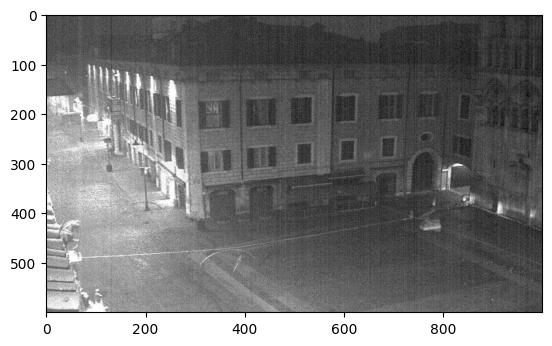

In [108]:
plt.imshow(lista_padronizada_teste.imagem[159], cmap = "gray");

In [109]:
classificador_decision_tree.predict([[lista_padronizada_treinamento.media[159]]])

array([1])

## 6. Teste do modelo

Dado o conjunto de testes, verificar a acurácia do modelo.

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_test, Y_test = definicao_feature_class(lista_padronizada_teste)
Y_pred = classificador_decision_tree.predict(X_test)

## 6.1 Precisão

Calcular a precisão do modelo com base os dados de teste.

In [111]:
print(classification_report(y_pred = Y_pred, y_true = Y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.97      0.95      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



## 6.2 Matriz de confusão

Calcular a matriz de confusão do modelo, levando em consideração os dados de teste.

<Axes: >

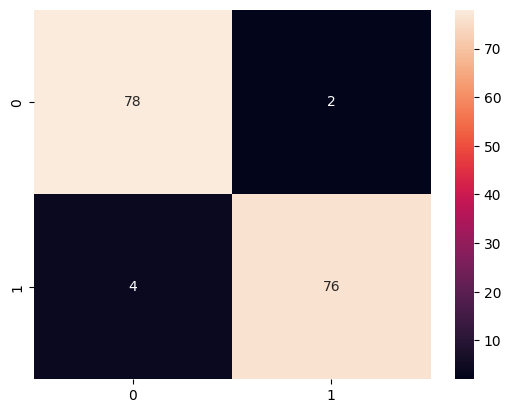

In [113]:
# IMPLEMENTAR

# from sklearn.metrics import confusion_matrix
import seaborn as sns


matriz_confusao = confusion_matrix(y_pred = Y_pred, y_true = Y_test)
sns.heatmap(matriz_confusao, annot=True)

In [144]:
imagem_dia = Image.open(r"C:\Users\Henrico\Downloads\img_dia.jpg")

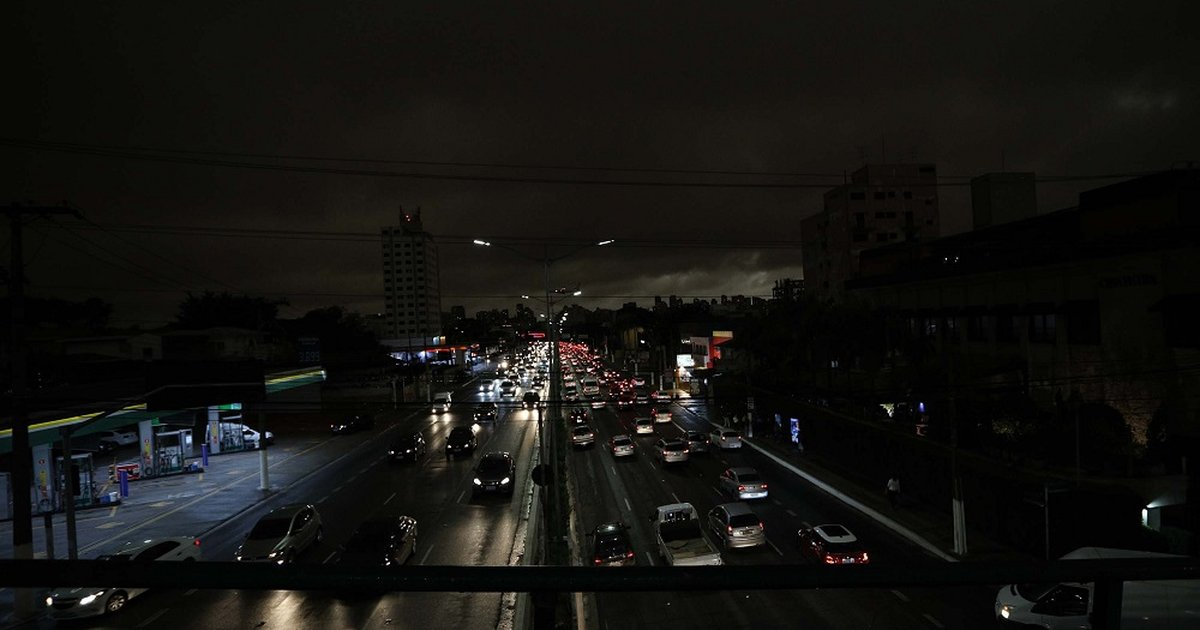

In [145]:
imagem_dia

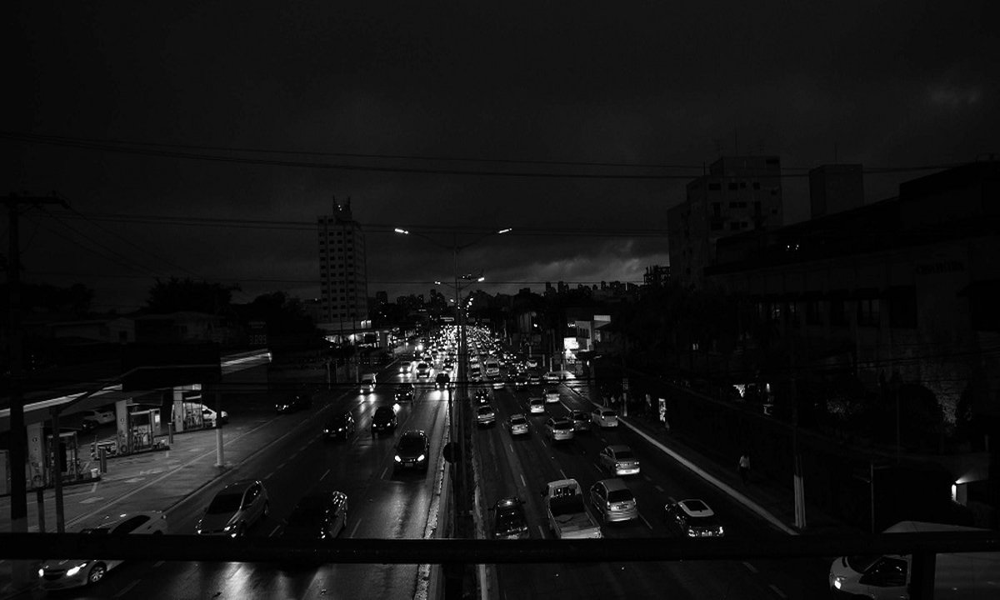

In [146]:
imagem_dia = padronizar_imagem(r"C:\Users\Henrico\Downloads\img_dia.jpg")
imagem_dia

In [147]:
imagem_dia.size

(1000, 600)

In [148]:
media_brilho = np.mean(imagem_dia)

In [149]:
media_brilho

18.802593333333334

In [150]:
classificador_decision_tree.predict([[media_brilho]])

array([1])